# Data Analitics Project: Computer Games Sales Analisys

# Data Description

- `Name` — game name
- `Platform` — game platform
- `Year_of_Release` — year of the game release
- `Genre` — game genre
- `NA_sales` — Sales in North America, million copies
- `EU_sales` — Sales in Europe, million copies)
- `JP_sales` — Sales in Japan, million copies
- `Other_sales` — Sales in Other countries, million copies
- `Critic_Score` — critics ratings (max 100)
- `User_Score` — users ratings (max 10)
- `Rating` — ESRB rating (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.
   

The data for the year 2016 may be incomplete.

# Project Description
* The online store "Streamchik" sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources.
* The goal is to identify patterns that determine the success of a game. This will allow us to bet on potentially popular products and plan advertising campaigns.
* We have data up to the year 2016. Let's assume it's December 2016, and we're planning a campaign for 2017.
* We need to develop a data handling strategy. It doesn't matter whether we're forecasting sales for 2017 based on 2016 data or for 2027 based on 2026 data.
* The dataset includes the abbreviation ESRB (Entertainment Software Rating Board) — an association that determines the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, such as "Adults Only," "Early Childhood," or "Teen."

## Reading a data file and studying general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net///datasets/games.csv')

In [3]:
data.head() #We looked at the beginning of the data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.sample(15) #We looked at the data sample

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15448,Prehistorik Man,GBA,2001.0,Platform,0.01,0.01,0.00,0.00,69.0,tbd,E
3595,Dr. Seuss' The Cat in the Hat,PS2,2003.0,Misc,0.27,0.21,0.00,0.07,56.0,6.5,E
1937,Mortal Kombat: Armageddon,PS2,2006.0,Fighting,0.88,0.04,0.00,0.14,75.0,8.5,M
8544,Beowulf: The Game,PS3,2007.0,Action,0.14,0.01,0.00,0.01,51.0,5.2,M
11365,Metal Slug Advance,GBA,2004.0,Shooter,0.06,0.02,0.00,0.00,79.0,8.3,T
7498,Mary-Kate and Ashley: Girls Night Out,GBA,2002.0,Misc,0.15,0.05,0.00,0.00,75.0,tbd,E
7284,Herdy Gerdy,PS2,2002.0,Adventure,0.11,0.08,0.00,0.03,69.0,5,E
15186,Harukanaru Toki no Naka de 3 with Izayoiki Aiz...,PSP,2009.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13509,The Hustle: Detroit Streets,PS2,2006.0,Sports,0.02,0.02,0.00,0.01,46.0,tbd,T
1314,Madden NFL 15,PS3,2014.0,Sports,1.08,0.11,0.00,0.27,NaN,2.7,E


In [5]:
data.info() #We looked at the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe() #We looked at the data description

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


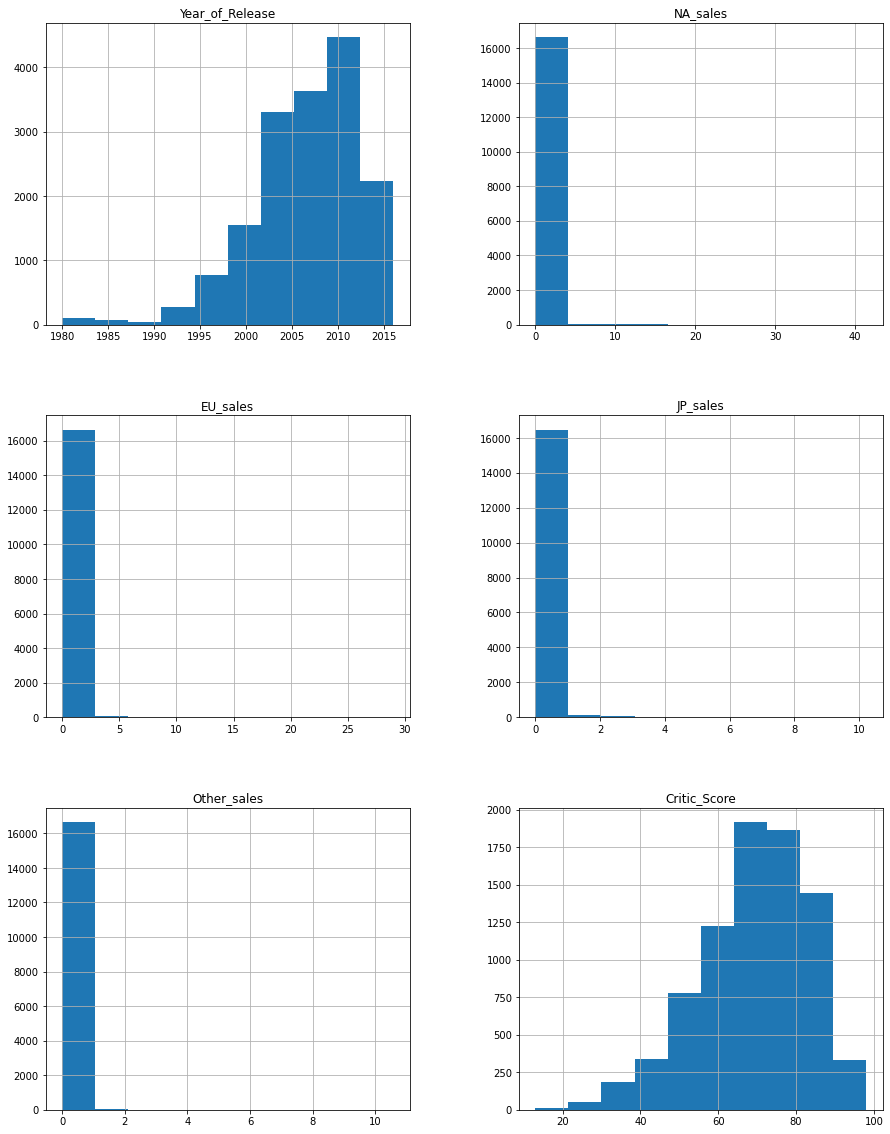

In [7]:
data.hist(figsize=(15, 20)); 

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Хорошая вводная часть.
</div>

### Summary
* Imported the necessary libraries for data analysis.
* Read the file.
* Examined the data information.
* Reviewed the beginning of the data and a random sample.
* Created histograms for all columns.


## Data Cleaning

* Rename column names to lowercase.
* Convert data to the appropriate types. Describe which columns had their data types changed and why.
* Handle missing values if necessary:
  * Explain why certain missing values were filled in a specific way or why they were not addressed.
  * Describe the reasons that could have led to the missing values.
  * Pay attention to the abbreviation 'tbd' in the column with user ratings. Analyze this value separately and describe how to handle it.
* Calculate total sales in all regions and record them in a separate column.

### Rename column names to lowercase

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Handle missing values

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

* Checked how much data is missing

In [11]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


* We looked at the ratio of missing values, and based on this, a decision can be made regarding whether to delete, replace, or ignore the missing values.
* It appears that the column with critic scores has the highest number of missing values.


In [12]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])

We removed unwanted rows: those with missing game titles and release years. These data account for less than 5%, so they can be disregarded.

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

* We looked again at the results of the manipulation

### Convert the data into the required types

In [14]:
data['year_of_release'] = data['year_of_release'].apply(np.int64)
data.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1523,Crysis 2,PS3,2011,Action,0.46,0.56,0.06,0.21,85.0,7.2,M
5863,Lego Batman 3: Beyond Gotham,PSV,2014,Action,0.05,0.19,0.00,0.07,NaN,7.7,E10+
15101,La Corda d'Oro 4,PSV,2016,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11483,Jikkyou Powerful Major League 2009,PS2,2009,Sports,0.00,0.00,0.08,0.00,NaN,NaN,NaN
727,Borderlands 2,PS3,2012,Shooter,1.05,0.72,0.10,0.35,91.0,8.2,M
15551,Mortal Kombat,PC,1994,Fighting,0.02,0.00,0.00,0.00,NaN,NaN,NaN
8388,Demon Gaze,PSV,2013,Role-Playing,0.04,0.02,0.08,0.02,70.0,7.4,T
15480,Elminage Original: Majo to Megami to Kamigami ...,PSP,2011,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14286,Safari Adventures: Africa,Wii,2007,Adventure,0.03,0.00,0.00,0.00,NaN,tbd,E
16228,Big Hero 6: Battle in the Bay,3DS,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN


* Converted the release year data to the data type int so that we could perform manipulations on the data

In [16]:
data.loc[data['user_score'] == 'tbd'] = 0

In [17]:
data[data['user_score'] == 'Zumba Fitness'] = 0

* Here we also have to replace it with 0; here will be the only row where one value is duplicated in the wrong column.

In [18]:
data['user_score'] = data['user_score'].astype('float')

* Now we can convert user_score to the data type float to perform mathematical operations on this column. It was not possible with the object data type.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     9303 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9818 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


* Check the results

In [20]:
data.duplicated().sum()

2375

In [21]:
data = data.drop_duplicates().reset_index(drop=True)

In [22]:
data.duplicated().sum()

0

* We removed obvious duplicates.

In [23]:
data['rating'] = data['rating'].fillna('Unknown')

### Calculate the total sales in all regions and record them in a separate column.

In [24]:
#Calculate the total sales in all regions and record them in a separate column
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']



* We calculated the total sales in all regions and recorded them in a separate column. (It can be calculated in two ways)

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,30.38


## Summary
* Converted column names to lowercase.
* Checked how much data is missing.
* Examined the proportion of missing values, leading to decisions on whether to delete, replace, or ignore missing values.
* Found that the column with critic scores has the most missing values.
* Removed unwanted rows: those with missing game titles and release years. These data account for less than 5% so they can be disregarded.
* Transformed release year data into integer type to perform manipulations on the data.
* Filled in some missing data with zeros.
* We cannot ignore 'tbd' and leave it as is because we need to convert the data to type float for further calculations. If we don't do this, it will raise an error. Therefore, we replaced it with 0.
* Converted user_score to the data type float to perform mathematical operations on this column. It was not possible with the object data type.
* Removed obvious duplicates.
* Filled NaN values in the rating column with 'Unknown', as ratings are only assigned for Canada and the USA. If we leave the missing values, we won't be able to analyze the sales of unrated games.
* Calculated the total sales in all regions and recorded them in a separate column. (It can be calculated in two ways).

## Research Data Analysis

* Look at how many games were released in different years. Are data for all periods important?
* Examine how sales have changed by platform. Select platforms with the highest total sales and plot their distribution over the years. How long does it typically take for new platforms to appear and old ones to disappear?
* Take data for the corresponding relevant period. Define the relevant period based on the results of the previous questions. The main factor is that this data will help forecast for 2017.
* Do not consider data from previous years in the analysis.
* Which platforms lead in sales, grow, or decline? Choose several potentially profitable platforms.
* Create a box plot of global game sales broken down by platform. Describe the results.
* Examine how user and critic reviews affect sales within one popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions.
* Compare the conclusions with game sales on other platforms.
* Look at the overall distribution of games by genre. What can be said about the most profitable genres? Are there genres with high and low sales?

### Look at how many games were released in different years.

In [26]:
data['name'].unique().tolist()

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

* Looked at the unique titles of games

In [27]:
data['year_of_release'].value_counts()

2008    1101
2009    1021
2007    1005
2010     924
2011     919
2006     882
2005     818
2003     680
2004     655
2002     637
2012     629
2015     568
2014     560
2013     529
2016     468
2001     400
1998     379
1999     330
2000     307
1997     288
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
0          1
Name: year_of_release, dtype: int64

* Looked at how many games were released each year.

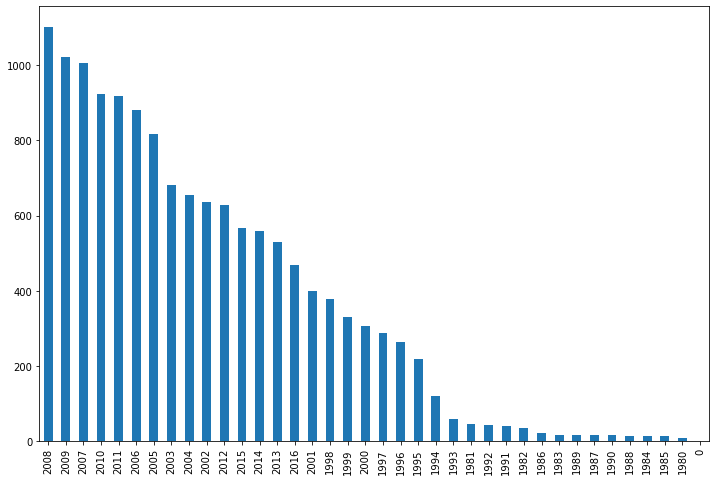

In [28]:
data['year_of_release'].value_counts().plot(kind='bar', figsize = (12,8));

* Created graphs to visualize the results

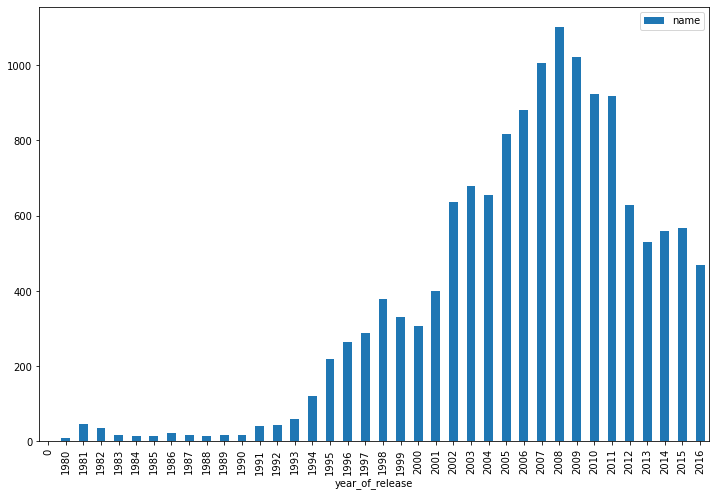

In [29]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize = (12,8));
#or data[data['year_of_release'] != 0].groupby('year_of_release').agg({'sales_sum':'sum'}).plot();

* Created graphs to visualize the results

### Examine how sales have changed by platform. Select platforms with the highest total sales and plot their distribution over the years.

In [30]:
data.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by=['sales_sum'], ascending=False)

,sales_sum
platform,
PS2,991.35
X360,864.84
PS3,787.72
Wii,721.91
PS,674.45
DS,608.14
PS4,265.67
GBA,257.00
GB,246.27


* Looked at the total sales by platform for all years.

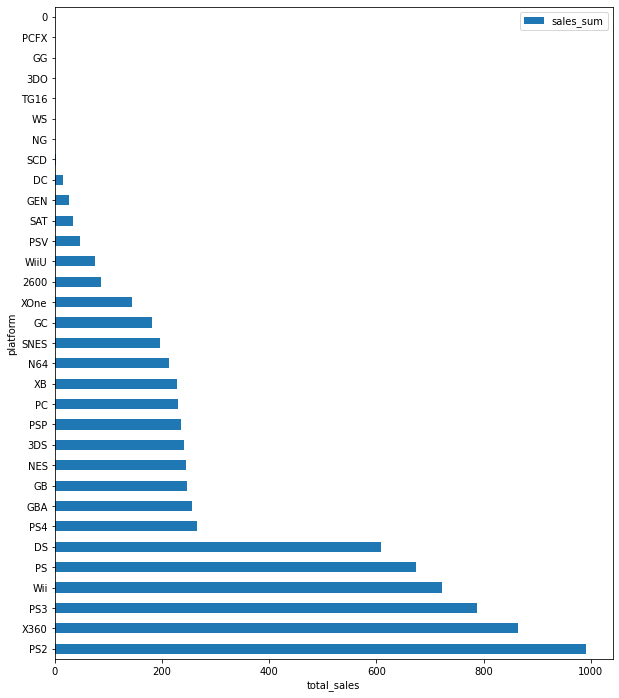

In [31]:
data.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by=['sales_sum'], ascending=False).plot(kind='barh', figsize=(10, 12)).set(xlabel='total_sales', ylabel='platform');

* Examine the lifecycle of platforms.

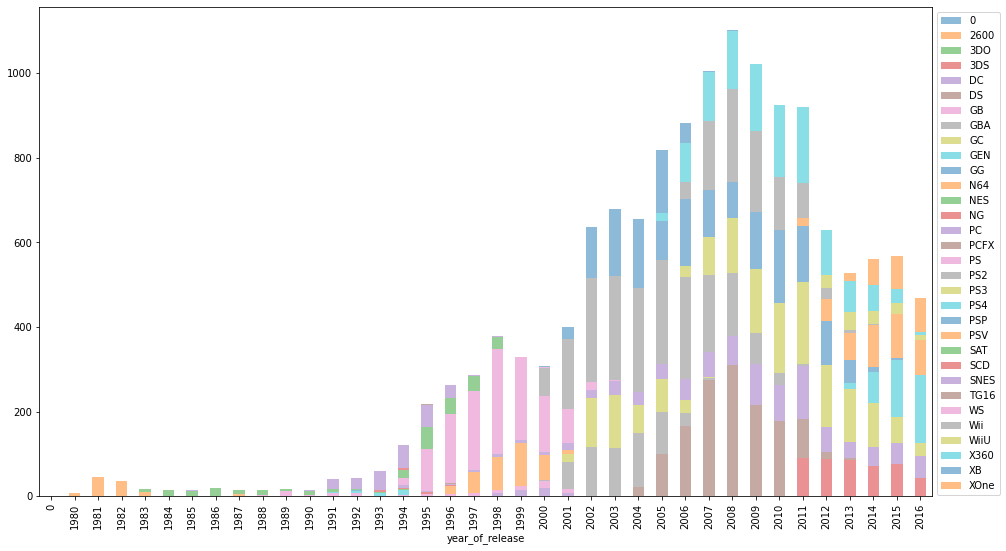

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))

data.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,9), alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

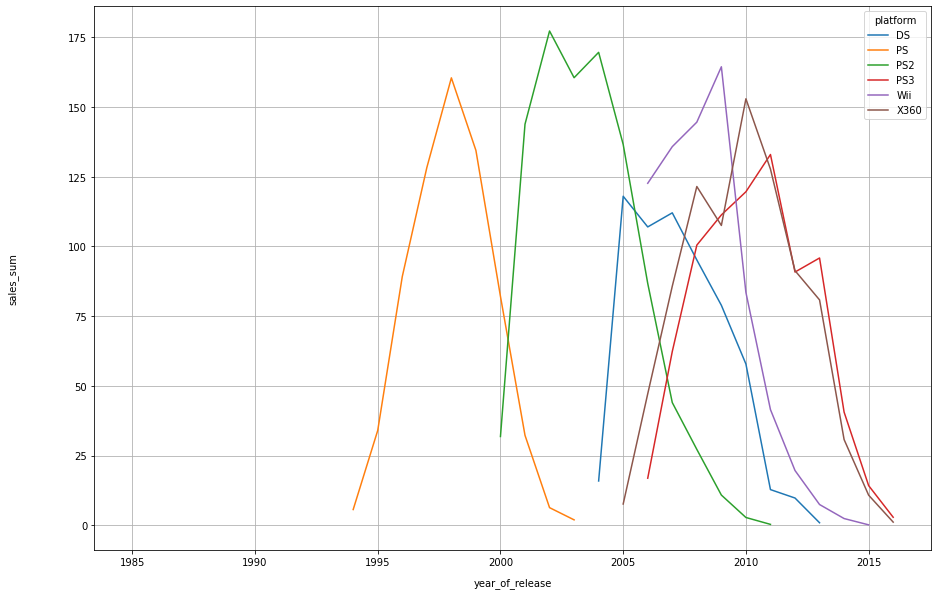

In [33]:
data_top_platforms = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']").pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum').sort_values('year_of_release', ascending=False)
data_top_platforms.plot(figsize=(15, 10), label='platform', grid=True);
plt.xlabel("year_of_release", labelpad=10)
plt.ylabel("sales_sum", labelpad=50)
plt.show()

###  Take data for the corresponding relevant period. The main factor is that these data will help forecast for 2017. We won't consider data from previous years in our analysis.

Consider the period from 2013 to 2015, along with partial data for 2016, as the relevant period for our analysis.

In [35]:
data_sorted = data.query('year_of_release >= 2013')

### Identify the platforms that lead in sales and analyze whether they are growing or declining. We'll also select several potentially profitable platforms.

In [36]:
data_sorted.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by=['sales_sum'], ascending=False)

,sales_sum
platform,
PS4,265.67
PS3,153.48
XOne,144.54
3DS,135.52
X360,123.44
WiiU,59.58
PC,36.38
PSV,29.46
Wii,9.97


* Looked at the leading platforms.

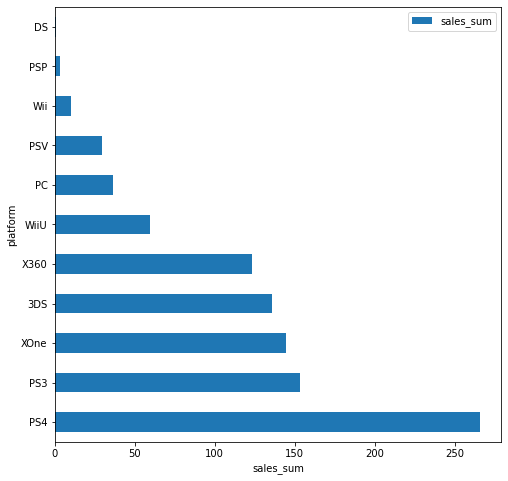

In [37]:
data_sorted.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by=['sales_sum'], ascending=False).plot(kind='barh', figsize=(8, 8)).set(xlabel='sales_sum', ylabel='platform');

* Created a graph to visualize the leading platforms

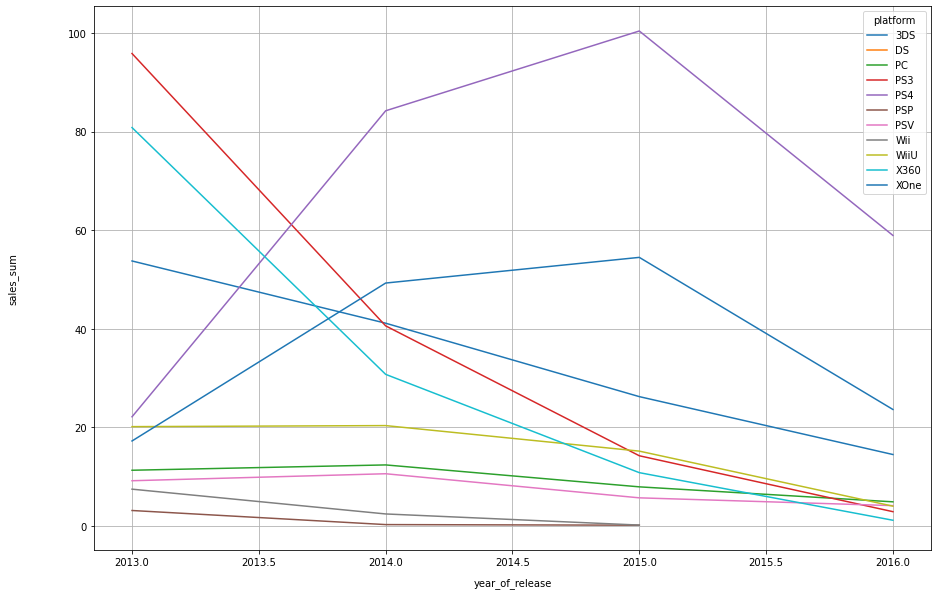

In [38]:
data_sorted.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum').sort_values('year_of_release', ascending=False).plot(figsize=(15, 10), label='platform', grid=True);
plt.xlabel("year_of_release", labelpad=10)
plt.ylabel("sales_sum", labelpad=50)
plt.show()

* Created graphs to visualize sales for the leading platforms during the relevant period.

#### Summary
From the analysis and the constructed graph, the most profitable platforms are PS4, PS3, XOne, 3DS, and X360. The overall trend is a decline in sales.

### Create a box plot of global game sales broken down by platform and describe the result.

In [41]:
data_sorted = data.query('year_of_release >= 2013 & platform in ["PS4", "PS3", "XOne", "3DS", "X360"]')

* sorted the data by the relevant period and leading platforms.

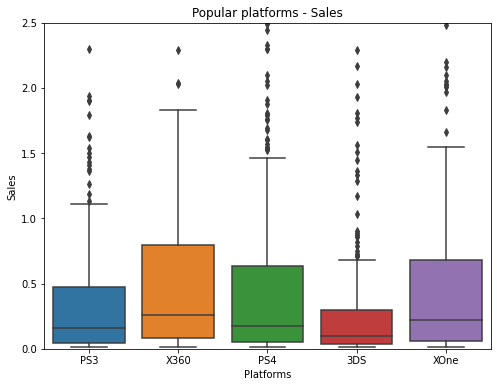

In [42]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(x='platform', y='sales_sum', data=data_sorted)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Sales')
ax.set_xlabel('Platforms')
ax.set_title('Popular platforms - Sales')
plt.show()


* created box plots.

#### Summary
From the box plot, we observe that the median values tend to be lower. Outliers are present for each platform. This may indicate that while the majority of games are priced at an average level, there are games on each platform that are priced higher.

### Examine how user and critic reviews affect sales within one popular platform. We'll create a scatter plot and calculate the correlation between reviews and sales.

* analyze the PS4 platform as the most popular one

In [43]:
data_sorted.query('platform == "PS4"')['sales_sum'].corr(data_sorted.query('platform == "PS4"')['user_score'])

-0.03126053686666919

In [44]:
data_sorted.query('platform == "PS4"')['sales_sum'].corr(data_sorted.query('platform == "PS4"')['critic_score'])

0.4057927489759

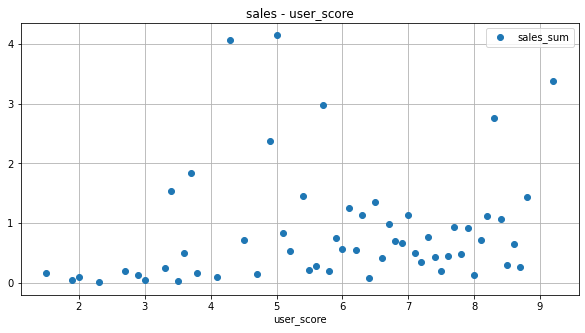

In [45]:
data_sorted.query('platform == "PS4"').pivot_table(index='user_score', values='sales_sum').plot(grid=True, style='o', figsize=(10, 5));
plt.title('sales - user_score');

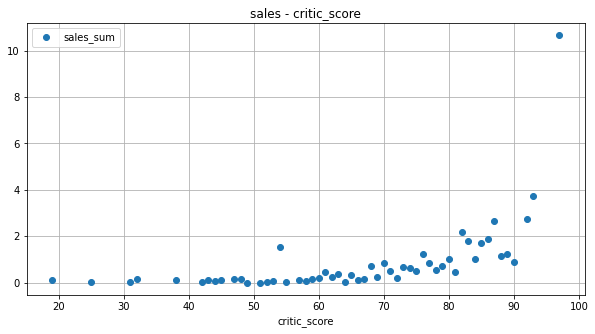

In [46]:
data_sorted.query('platform == "PS4"').pivot_table(index='critic_score', values='sales_sum').plot(grid=True, style='o', figsize=(10, 5));
plt.title('sales - critic_score');

* create a scatter plot for the five popular platforms

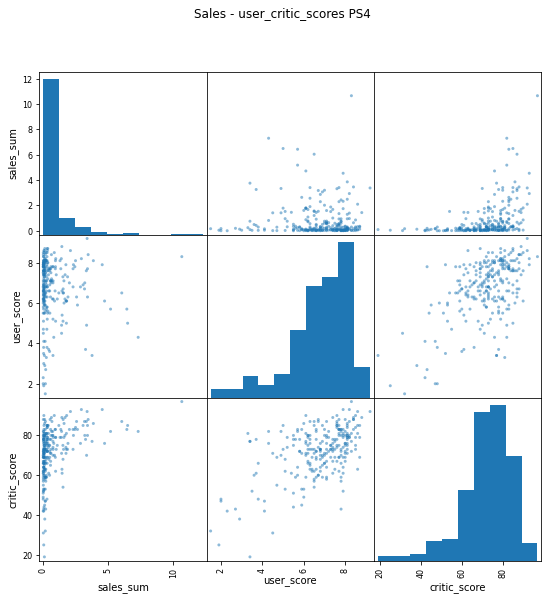

,sales_sum,user_score,critic_score
sales_sum,1.000000,-0.031261,0.405793
user_score,-0.031261,1.000000,0.557654
critic_score,0.405793,0.557654,1.000000


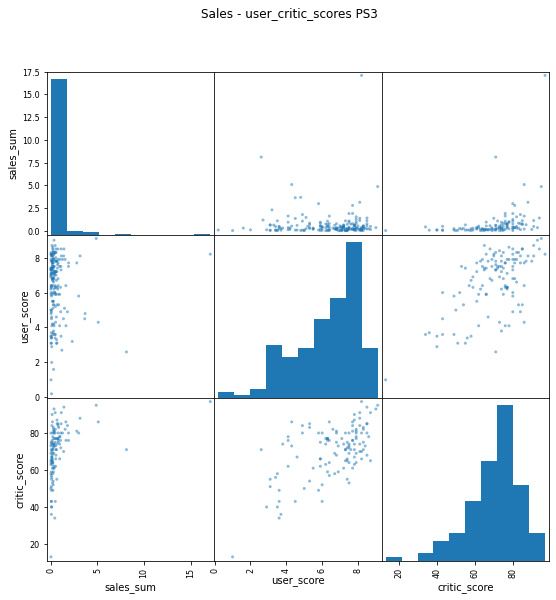

,sales_sum,user_score,critic_score
sales_sum,1.000000,0.001899,0.336898
user_score,0.001899,1.000000,0.599920
critic_score,0.336898,0.599920,1.000000


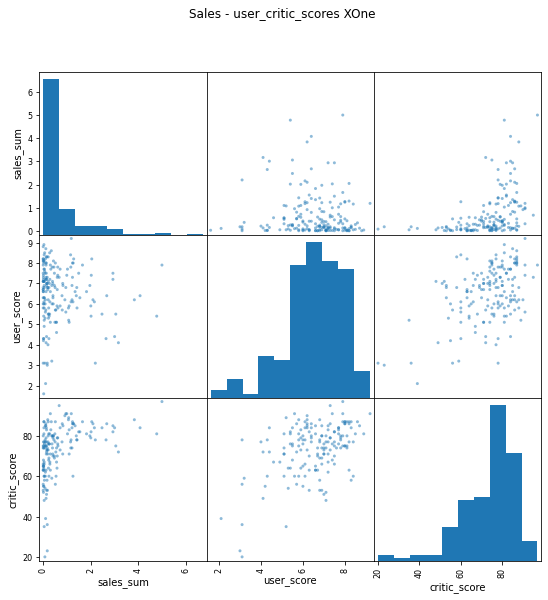

,sales_sum,user_score,critic_score
sales_sum,1.000000,-0.068804,0.412384
user_score,-0.068804,1.000000,0.472462
critic_score,0.412384,0.472462,1.000000


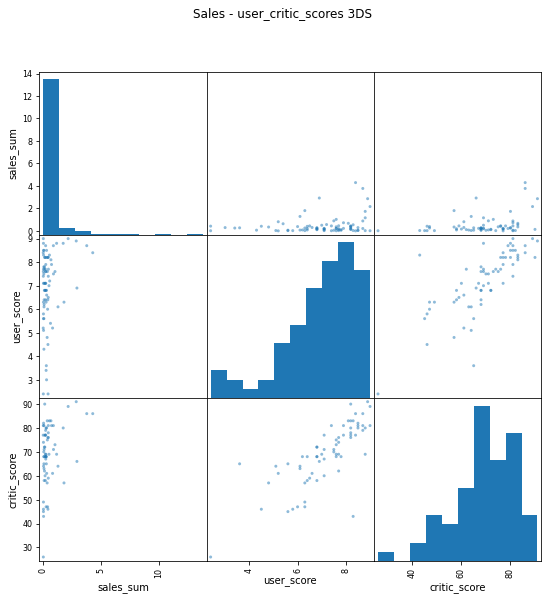

,sales_sum,user_score,critic_score
sales_sum,1.000000,0.242414,0.337887
user_score,0.242414,1.000000,0.769536
critic_score,0.337887,0.769536,1.000000


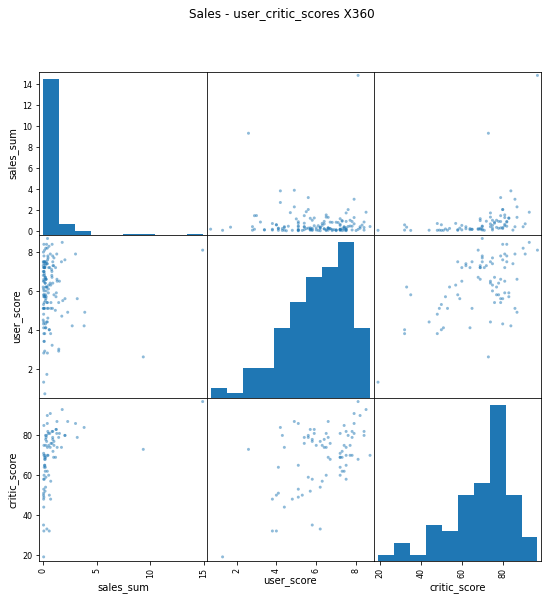

,sales_sum,user_score,critic_score
sales_sum,1.000000,-0.011054,0.350431
user_score,-0.011054,1.000000,0.520946
critic_score,0.350431,0.520946,1.000000


In [47]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']

for platform in platforms:
    data_sorted_platforms = data_sorted.query('platform == @platform')[['sales_sum','user_score', 'critic_score']]
    pd.plotting.scatter_matrix(data_sorted_platforms, figsize=(9, 9))
    plt.suptitle(f'Sales - user_critic_scores {platform}')
    plt.show()   
    
    display(data_sorted.query('platform == @platform')[['sales_sum','user_score', 'critic_score']].agg('corr'))

#### Summary
* We examined how critic and user reviews affect sales for the five platforms: 'PS4', 'PS3', 'XOne', '3DS', 'X360'.
* We can conclude that critic scores have a greater influence on sales than user scores.

### Examine the overall distribution of games by genre.

In [48]:
data_sorted['genre'].value_counts()
#data_sorted.groupby('genre').agg({'name':'count'}).reset_index().sort_values(by='name', ascending=False)

Action          491
Role-Playing    184
Sports          161
Shooter         139
Adventure       104
Misc             89
Racing           61
Fighting         61
Platform         43
Simulation       32
Strategy         25
Puzzle            8
Name: genre, dtype: int64

* The genre 'Action' leads in terms of the number of games sold.

In [49]:
data_sorted.pivot_table(index='genre', values='sales_sum', aggfunc='median').sort_values(by=['sales_sum'], ascending=False)

,sales_sum
genre,
Shooter,0.570
Sports,0.360
Platform,0.220
Racing,0.200
Role-Playing,0.170
Misc,0.160
Action,0.150
Fighting,0.140
Simulation,0.105


* The genre 'Shooter' leads in terms of median sales

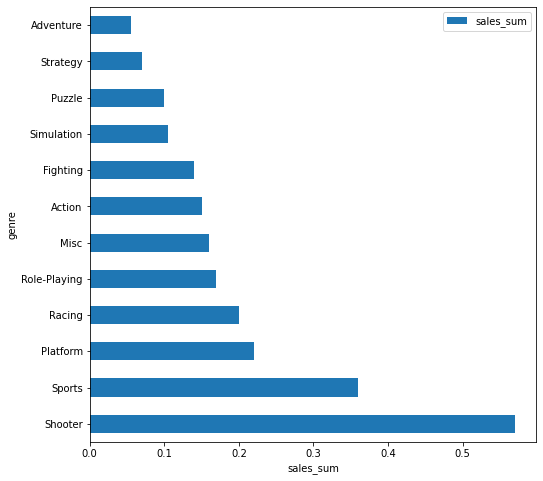

In [50]:
data_sorted.pivot_table(index='genre', values='sales_sum', aggfunc='median').sort_values(by=['sales_sum'], ascending=False).plot(kind='barh', figsize=(8, 8)).set(xlabel='sales_sum', ylabel='genre');

### Summary:

* We examined the unique names of games.
* We looked at how many games were released each year.
* Graphs were constructed to visualize the results.
* The highest number of games was produced in 2008. The fewest in 1996, which is understandable as computer games were just starting to appear. Data for these years are not as important.
* We examined the total sales by platform over all years.
* The most profitable platforms are PS2, X360, PS3, Wii, PS, DS.
* We looked at the life cycle of platforms.
* The lifespan of platforms is approximately 10 years. The current period can be taken as data from 2 years - 2013-2015 plus part of 2016, as the data for 2016 is incomplete.
* We looked at the leading platforms.
* A graph was constructed to visualize the leading platforms.
* Graphs were created to visualize sales for the leading platforms for the current period.
* The general trend is a decline in sales.
* The data was sorted by the current period and leading platforms.
* Box plots were created.
* From the graph, we can see that the median values tend to be lower. Each platform has outliers. This may mean that there are mainly games at an average price, but for each platform there are games at a high price.
* We looked at how reviews from users and critics affect sales within one popular platform.
* A scatter plot was constructed and the correlation between reviews and sales was calculated.
* We analyzed the PS4 platform as the most popular one.
* A scatter plot was created for the five popular platforms.
* We examined how reviews from critics and users affect sales for the five platforms: 'PS4', 'PS3', 'XOne', '3DS', 'X360'.
* We can conclude that critic reviews have a greater influence on sales than user reviews.
* We looked at the overall distribution of games by genre.
* The 'Action' genre leads in terms of the number of games sold.
* The 'Shooter' genre leads in terms of median sales.

## Create a users profile for each region

For users in each region (NA, EU, JP):

* The most popular platforms (top 5). Describe the differences in sales shares.
* The most popular genres (top 5). Explain the differences.
* Does the ESRB rating affect sales in a specific region?

###  The top 5 platform

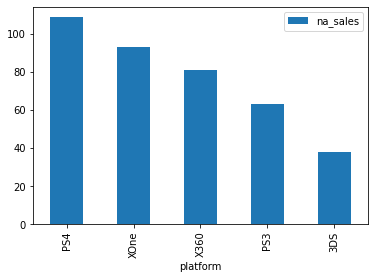

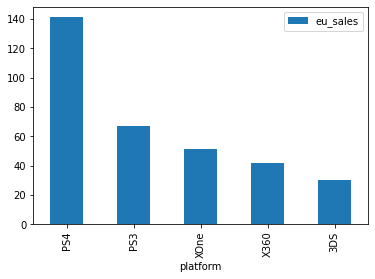

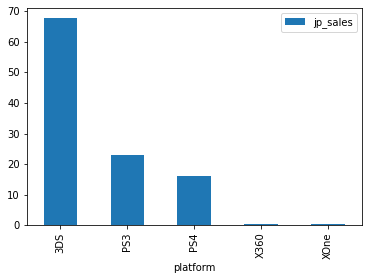

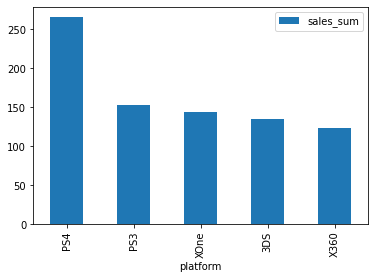

In [51]:
data_sorted.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('platform').agg({'sales_sum':'sum'}).sort_values(by='sales_sum', ascending=False).head().plot(kind='bar');

### The top 5 genre

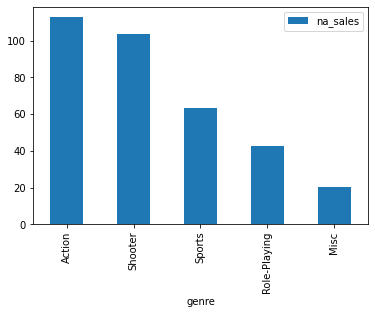

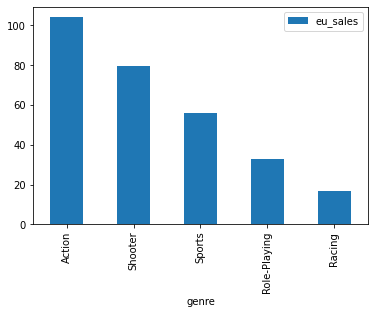

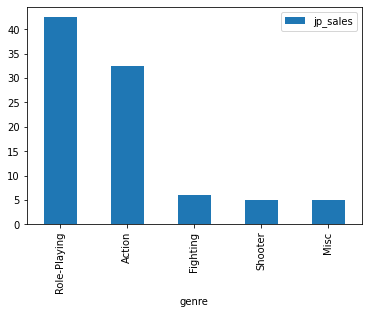

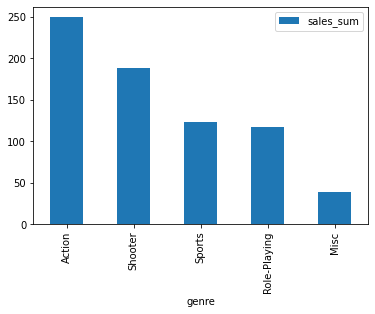

In [52]:
data_sorted.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('genre').agg({'sales_sum':'sum'}).sort_values(by='sales_sum', ascending=False).head().plot(kind='bar');

### Does the ESRB rating affect sales in a particular region?

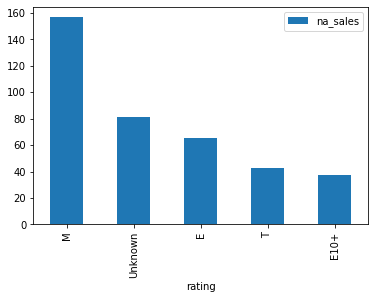

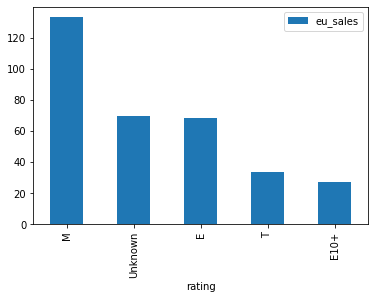

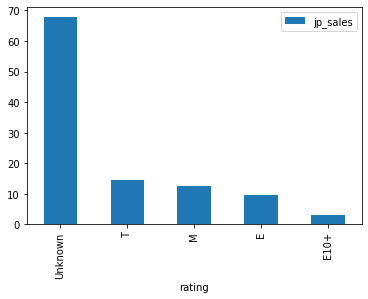

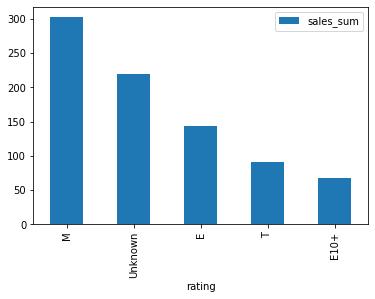

In [53]:
data_sorted.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar');
data_sorted.groupby('rating').agg({'sales_sum':'sum'}).sort_values(by='sales_sum', ascending=False).head().plot(kind='bar');

#### Conclusion
The ESRB rating is intended for marking games in the USA and Canada. Since we filled missing values in the rating column with placeholders, we can see that unrated games account for a significant share of sales.

### Summary:

* Top platforms:
  * North America: PS4, XOne, X360, PS3, 3DS
  * Europe: PS4, PS3, XOne, X360, 3DS
  * Japan: 3DS, PS3, PS4, X360, XOne
* Top genres:
  * North America: Action, Shooter, Sports, Role-Playing, Misc.
  * Europe: Action, Shooter, Sports, Role-Playing, Racing
  * Japan: Role-Playing, Action, Fighting, Shooter, Misc.
* Based on the graph, ratings undoubtedly influence sales.
* The ESRB rating is intended for marking games in the USA and Canada. Since we filled missing values in the rating column with placeholders, we can see that unrated games account for a significant share of sales.

## **Summary**

**1. Data Exploration and Initial Analysis:**
   * Imported necessary libraries for data analysis.
   * Read the file.
   * Reviewed information about the data.
   * Examined the beginning of the data and a random sample.
   * Constructed histograms for all columns.

**2. Data Preparation:**
   * Converted column names to lowercase.
   * Checked for missing data.
   * Calculated the proportion of missing values and decided to either drop, replace, or ignore them.
   * Deleted unwanted rows containing missing game titles and release years, which accounted for less than 5% of the data.
   * Converted the release year data type to integer for easier manipulation.
   * Filled in some missing data with zeros.
   * Replaced 'tbd' values with zeros as it signifies to-be-determined scores.
   * Converted 'user_score' to float data type for numerical operations, which was not possible when it was an object.
   * Removed obvious duplicates.
   * Filled NaN values in the rating column with 'Unknown' since the ESRB rating is intended for marking games in the USA and Canada. Leaving the ratings as NaN would hinder analysis of sales for games without a rating.
   * Calculated total sales across all regions and recorded them in a separate column (could be done in two ways).

**3. Exploratory Data Analysis:**
   * Explored unique game titles.
   * Examined the number of games released each year.
   * Constructed graphs for visualizing the results.
   * Noticed that the highest number of games were produced in 2008, while the lowest was in 1996, which is understandable as computer games were just beginning to emerge. Data for these years are not as crucial.
   * Examined total sales by platform over the years.
   * Identified the most profitable platforms.
   * Analyzed the life cycle of platforms.
   * The lifespan of platforms is approximately 10 years. The actual period can be taken as data for 2 years - 2013-2015 plus part of 2016, as the data for 2016 is incomplete.
   * Identified the leading platforms.
   * Created a graph to visualize sales trends for the leading platforms.
   * Generated graphs to visualize sales for the leading platforms during the relevant period.
   * The general trend is a decline in sales.
   * Sorted the data by the relevant period and leading platforms.
   * Constructed box plots.
   * From the box plot, we see that median values tend to be underestimated. Each platform exhibits outliers. This may indicate that while the majority of games are priced at an average level, there are also high-priced games for each platform.
   * Explored the impact of user and critic reviews on sales within a popular platform.
   * Constructed a scatter plot and calculated the correlation between reviews and sales.
   * Analyzed the PS4 platform as the most popular one.
   * Plotted a scatter plot for the top five popular platforms.
   * Examined how reviews from critics and users affect sales for five platforms: 'PS4', 'PS3', 'XOne', '3DS', 'X360'.
   * Concluded that critic ratings have a greater impact on sales than user ratings.
   * Examined the overall distribution of games by genre.
   * Action is the genre with the highest number of games sold.
   * Shooter genre leads in median sales.

**4. Regional User Portrait:**
   * Top platforms:
     * North America: PS4, XOne, X360, PS3, 3DS
     * Europe: PS4, PS3, XOne, X360, 3DS
     * Japan: 3DS, PS3, PS4, X360, XOne
   * Top genres:
     * North America: Action, Shooter, Sports, Role-Playing, Misc.
     * Europe: Action, Shooter, Sports, Role-Playing, Racing
     * Japan: Role-Playing, Action, Fighting, Shooter, Misc.
   * Ratings undoubtedly influence sales based on the graph.
   * The ESRB rating is intended for marking games in the USA and Canada. Since we filled missing values in the rating column with placeholders, we can see that unrated games account for a significant share of sales.